In [1]:
import csv
import matplotlib.pyplot as plt
import sqlite3
import knmi
import pandas as pd

In [2]:
new_file=open("doorlooptijden.csv", "w", newline='')
writer=csv.writer(new_file , delimiter=";")

In [3]:
con = sqlite3.connect("NO_XXX_EVENT_EXPORT/bridges.db")
cur = con.cursor()

cur.execute('SELECT Tijd, Waarde, Omschrijving FROM WA WHERE Tijd LIKE "%-01-2016%" AND Omschrijving == "SFC Aandrijving Commando Brug Openen" AND Waarde == "TRUE" OR Tijd LIKE "%-01-2016%" AND Omschrijving == "SFC Aandrijving Commando Brug Sluiten" AND Waarde == "FALSE" ORDER BY Tijd')
writer.writerow(['Dag', 'Maand', 'Jaar', 'Tijd', 'Open'])
for row in cur.fetchall():
    for column in row:
        if column == row[0]:
            dag = column[0:2]
            maand = column[3:5]
            jaar = column[6:10]
            tijd = column[11:23]
        if column == row[1]:
            opened = column
    writer.writerow([dag, maand, jaar, tijd, opened])
con.close()
new_file.close()

In [4]:
timelist = []
daylist = []

In [5]:
with open("doorlooptijden.csv") as f:
    first = None
    second = None
    Fday = None
    Sday = None
    r = csv.reader(f, delimiter=";")
    next(r)
    for row in r:
        for column in row:
            if column == row[3]:
                if first == None:
                    Fday = int(row[0])
                    Fhour = int(column[0:2])
                    Fminute = int(column[3:5])
                    Fsecond = int(column[6:8])
                    Fmilisecond = int(column[9:12])
                    first = Fhour*60*60*1000 +Fminute*60*1000 + Fsecond*1000 + Fmilisecond
                else:
                    Sday = int(row[0])
                    Shour = int(column[0:2])
                    Sminute = int(column[3:5])
                    Ssecond = int(column[6:8])
                    Smilisecond = int(column[9:12])
                    second = Shour*60*60*1000 +Sminute*60*1000 + Ssecond*1000 + Smilisecond
                    time_between = second-first
                    if time_between < 0:
                        time_between = second-first+24*60*60*1000
                        
                    if ((Sday-Fday)/2) == 0.5:
                        _day = Fday + 0.5
                    else:
                        _day = Fday
                        
                    print(str(_day)+" "+str("{:02d}".format(int(int((time_between-time_between%1000)/1000)/60)))+":"+str("{:02d}".format(int((time_between-time_between%1000)/1000)%60)))
                    timelist += [time_between/1000]
                    daylist += [_day]
                    first = None
                    second = None    

4 05:06
5 04:45
6 06:08
6 04:46
6 04:57
7 05:06
7 05:03
7 04:04
8 05:37
8 04:54
8 05:46
11 03:26
12 05:01
13 01:43
13 11:31
13 04:21
13 07:32
13 05:34
14 96:15
14 03:27
14 04:13
15 04:28
15 05:00
15 04:35
15 07:54
16 04:33
16 03:51
17 04:59
17 04:05
19 05:52
19 04:39
19 05:22
20 05:13
21 06:41
21 07:37
21 04:50
22 04:28
22 04:59
24 05:02
24 04:52
25 06:05
25 04:48
25 08:38
26 05:05
26 04:24
26 07:12
26 02:33
26 02:45
26 06:06
26 05:59
26 05:15
27 04:28
27 05:15
27 04:06
27 05:24
27 04:59
27 04:34
27 04:34
28 05:34
28 04:07
28 04:20
28 05:02
29 04:38
29 03:43
29.5 04:37
30 05:21
30 04:13
31 04:35


In [6]:
df10 = pd.read_csv('doorlooptijdboy.csv', delimiter= ',')
df11 = df10['time']
df12 = df10['duur'][1]
print(df12)

82


In [7]:
all = []
count = 0
for row in df11:
    first, second = row.split()
    all += [first]
print(all)

['2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-02', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-03', '2015-12-04', '2015-12-04', '2015-12-05', '2015-12-05', '2015-12-07', '2015-12-07', '2015-12-07', '2015-12-07', '2015-12-07', '2015-12-07', '2015-12-07', '2015-12-07', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-08', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015-12-09', '2015

In [8]:
daylist1 = []
for row in all:
    year1, month1, day1 = row.split('-')
    daylist1 += [day1]

In [9]:
print(daylist1)

['02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '02', '03', '03', '03', '03', '03', '03', '03', '03', '03', '03', '03', '03', '03', '03', '04', '04', '05', '05', '07', '07', '07', '07', '07', '07', '07', '07', '08', '08', '08', '08', '08', '08', '08', '08', '08', '08', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '09', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '15', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '16', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '17', '18

In [10]:
daysss = daylist1[:217]

In [11]:
print(daylist)

[4, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 11, 12, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 16, 16, 17, 17, 19, 19, 19, 20, 21, 21, 21, 22, 22, 24, 24, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29.5, 30, 30, 31]


In [12]:
rows = zip(daylist, timelist)
new_file2=open("doorloopsec.csv", "w", newline='')
writer=csv.writer(new_file2 , delimiter=";")
writer.writerow(['Dag', 'Tijd'])
for row in rows:
    writer.writerow(row)
new_file2.close()

In [13]:
df = pd.read_csv('doorloopsec.csv', delimiter= ';')
df.groupby('Dag')
df2 = df.drop_duplicates('Dag')

In [14]:
disclaimer, stations, legend, data = knmi.get_day_data_raw(stations=['350'], start='20151201', end='20151231', inseason=False, variables=['TEMP'])

In [15]:
print(data)

STN,YYYYMMDD,TG,TN,TNH,TX,TXH,T10N,T10NH
350,20151201,105,80,6,129,15,79,6
350,20151202,110,95,20,126,13,87,24
350,20151203,96,81,23,121,13,74,18
350,20151204,90,79,19,108,13,71,24
350,20151205,77,68,7,88,15,61,12
350,20151206,106,72,1,123,19,66,6
350,20151207,105,80,24,134,12,66,24
350,20151208,99,75,2,123,13,61,6
350,20151209,67,30,7,98,13,4,12
350,20151210,53,37,8,81,13,33,12
350,20151211,67,46,2,99,15,39,24
350,20151212,76,28,3,119,20,6,6
350,20151213,75,65,8,116,2,63,12
350,20151214,67,25,19,94,12,1,24
350,20151215,77,38,1,103,23,33,6
350,20151216,119,96,1,130,13,94,6
350,20151217,137,127,9,159,13,117,18
350,20151218,120,106,18,132,1,98,12
350,20151219,124,103,7,145,15,95,12
350,20151220,120,98,8,136,14,88,12
350,20151221,110,99,8,121,22,91,12
350,20151222,130,112,1,142,19,105,6
350,20151223,102,58,20,131,2,37,24
350,20151224,101,67,1,138,14,59,6
350,20151225,97,61,5,139,24,46,6
350,20151226,126,103,21,146,14,96,24
350,20151227,115,85,24,136,15,71,24
350,20151228,79,39,7,116,13,25

In [16]:
csv = knmi.get_day_data_dataframe(stations=['350'], start='20151204', end='20160101', inseason=False, variables=['TEMP'])

In [17]:
tg = csv['TG']
date = csv.index
tglist = []
datelist =[]

for row in tg:
    tglist += [row]
for row in date:
    datelist += [str(row.day)+"-"+str(row.month)+"-"+str(row.year)]
    
tgdf = pd.DataFrame({'date':datelist,'temp':tglist})

print(tgdf.loc[tgdf['date'] == "4-12-2015"])

        date  temp
0  4-12-2015    90


In [18]:
df3 = pd.read_csv('doorloopsec.csv', delimiter= ';', usecols=[0])
index = 72
templist1 = []
timelist1 = []
df12 = []
while index <= 216:
    #day = df3.iloc[index]
    #day = str(day)
    #day1, day2 = day.split('.')
    #days, dayss = day1.split('    ') 
    #print(dayss)
    dayssss = daylist1[index]
    print(dayssss)
    tempor = tgdf.loc[tgdf['date'] == dayssss +"-12-2015"]
    tempor = str(tempor)
    df12 += [df10['duur'][index]]
    print(df12)
    print(tempor)
    name1, name2, name3, name4, name5 = tempor.split()
    print(name5)
    templist1 += [name5]
    timelist1 += [name4]
    index = index + 1
    
#knmi.get_day_data_dataframe(stations=['350'], start='20151204', end='20160101', inseason=False, variables=['TEMP'])

10
[80]
         date  temp
6  10-12-2015    53
53
10
[80, 84]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75, 83]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75, 83, 75]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75]
         date  temp
6  10-12-2015    53
53
10
[80, 84, 75, 83, 75, 8

[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84]
          date  temp
11  15-12-2015    77
77
15
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76]
          date  temp
11  15-12-2015    77
77
15
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76, 83]
          date  temp
11  15-12-2015    77
77
15
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82,

17
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76, 83, 82, 85, 79, 82, 74, 82, 75, 82, 77, 82, 74, 81, 78, 82, 81, 83, 78, 82, 78, 81, 74, 81, 74, 81, 72, 21, 82]
          date  temp
13  17-12-2015   137
137
17
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76, 83, 82, 85, 79, 82, 74, 82, 75, 82, 77, 82, 74, 81, 78, 82, 81, 83, 78, 82, 78, 81, 74, 81, 74, 81, 72, 21, 82, 77]
          date  temp
13  17-12-2015   137
137
17
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82

[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76, 83, 82, 85, 79, 82, 74, 82, 75, 82, 77, 82, 74, 81, 78, 82, 81, 83, 78, 82, 78, 81, 74, 81, 74, 81, 72, 21, 82, 77, 82, 78, 81, 82, 82, 77, 81, 80, 82, 85, 82, 141, 82, 82, 80, 82, 74, 82, 74, 82, 73, 81, 74, 82, 74, 82, 74, 82, 74, 82, 74, 83, 78, 82, 74, 82, 78, 82, 81, 82, 79, 82]
          date  temp
19  23-12-2015   102
102
23
[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76, 83, 82, 85, 79, 82, 74, 82, 75, 82, 77, 82, 74, 81, 78, 82, 81, 83, 78, 82, 78, 81, 74, 81, 74, 81, 72, 21, 82, 77, 82, 78, 81, 82, 82, 77, 81, 80, 82, 85, 82, 141, 82, 82, 80, 82, 74, 8

In [19]:
print(templist1)

['53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '53', '67', '67', '67', '67', '67', '67', '67', '67', '67', '67', '76', '76', '67', '67', '67', '67', '67', '67', '67', '67', '67', '67', '67', '67', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '119', '119', '119', '119', '119', '119', '119', '119', '119', '119', '119', '119', '119', '119', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '137', '120', '120', '120', '120', '120', '120', '124', '124', '124', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '110', '130', '130', '130', '130', '130', '130', '102', '102', '102', '102', '102', '102', '79', '79', '79', '79', '76', '76', '79', '79', '79', '79', '79', '79']


In [20]:
print(df12)

[80, 84, 75, 83, 75, 82, 75, 83, 75, 83, 76, 83, 75, 83, 82, 85, 86, 86, 79, 84, 75, 83, 76, 84, 79, 84, 86, 86, 85, 85, 77, 83, 74, 82, 74, 82, 78, 82, 78, 83, 79, 84, 79, 83, 74, 81, 74, 82, 75, 82, 74, 82, 75, 82, 8, 78, 83, 79, 84, 76, 83, 82, 85, 79, 82, 74, 82, 75, 82, 77, 82, 74, 81, 78, 82, 81, 83, 78, 82, 78, 81, 74, 81, 74, 81, 72, 21, 82, 77, 82, 78, 81, 82, 82, 77, 81, 80, 82, 85, 82, 141, 82, 82, 80, 82, 74, 82, 74, 82, 73, 81, 74, 82, 74, 82, 74, 82, 74, 82, 74, 83, 78, 82, 74, 82, 78, 82, 81, 82, 79, 82, 80, 83, 78, 82, 81, 83, 84, 85, 75, 83, 78, 84, 75, 84]


In [21]:
print(timelist)

[306.611, 285.604, 368.675, 286.394, 297.106, 306.105, 303.11, 244.404, 337.386, 294.484, 346.272, 206.8, 301.712, 103.306, 691.618, 261.294, 452.685, 334.799, 5775.994, 207.088, 253.885, 268.89, 300.2, 275.595, 474.512, 273.58, 231.826, 299.006, 245.291, 352.004, 279.876, 322.098, 313.613, 401.901, 457.215, 290.993, 268.605, 299.318, 302.814, 292.994, 365.609, 288.306, 518.697, 305.006, 264.796, 432.018, 153.794, 165.399, 366.369, 359.805, 315.006, 268.379, 315.391, 246.707, 324.683, 299.5, 274.891, 274.402, 334.405, 247.405, 260.985, 302.008, 278.203, 223.496, 277.183, 321.573, 253.3, 275.689]


In [22]:
dfTemp = pd.DataFrame(templist1)
dfTemp.head()

,0
0,53
1,53
2,53
3,53
4,53


In [23]:
print(timelist)
dfTime = pd.DataFrame(df12)

[306.611, 285.604, 368.675, 286.394, 297.106, 306.105, 303.11, 244.404, 337.386, 294.484, 346.272, 206.8, 301.712, 103.306, 691.618, 261.294, 452.685, 334.799, 5775.994, 207.088, 253.885, 268.89, 300.2, 275.595, 474.512, 273.58, 231.826, 299.006, 245.291, 352.004, 279.876, 322.098, 313.613, 401.901, 457.215, 290.993, 268.605, 299.318, 302.814, 292.994, 365.609, 288.306, 518.697, 305.006, 264.796, 432.018, 153.794, 165.399, 366.369, 359.805, 315.006, 268.379, 315.391, 246.707, 324.683, 299.5, 274.891, 274.402, 334.405, 247.405, 260.985, 302.008, 278.203, 223.496, 277.183, 321.573, 253.3, 275.689]


In [24]:
dfFinal1 = pd.concat([dfTemp, dfTime], axis=1)
dfFinal1.columns = ["Temp", "Time"]
dfFinal1.head()

,Temp,Time
0,53,80
1,53,84
2,53,75
3,53,83
4,53,75


ValueError: x and y must have same first dimension, but have shapes (68,) and (145,)

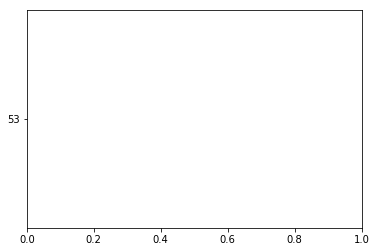

In [25]:
plt.plot(timelist, templist1)
plt.title("Temperatuur in December 2015 volgens KNMI")
plt.xlabel("Doorlooptijd")
plt.ylabel("temperatuur (0C)")
plt.show()

# Linear regression

imports

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [27]:
dfFinal1 = dfFinal1.sort_values('Temp', ascending=True)

Temp en Time moeten omgezet worden in strings voor de onderstaande functie.

In [28]:
print(dfFinal1)

    Temp  Time
132  102    83
131  102    80
130  102    82
129  102    79
128  102    82
127  102    81
116  110    82
109  110    73
110  110    81
111  110    74
112  110    82
113  110    74
114  110    82
115  110    74
106  110    82
117  110    74
120  110    83
119  110    74
108  110    82
105  110    74
104  110    82
103  110    80
118  110    82
107  110    74
71   119    74
73   119    78
74   119    82
72   119    81
70   119    82
63   119    79
..   ...   ...
42    77    79
60    77    83
59    77    76
58    77    84
57    77    79
62    77    85
55    77    78
54    77     8
53    77    82
52    77    75
56    77    83
50    77    74
49    77    82
48    77    75
47    77    82
46    77    74
45    77    81
44    77    74
51    77    82
43    77    83
142   79    84
141   79    78
140   79    83
139   79    75
135   79    81
136   79    83
134   79    82
133   79    78
143   79    75
144   79    84

[145 rows x 2 columns]


[[3]]


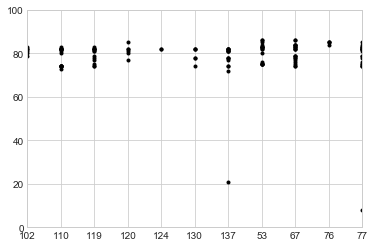

In [29]:
y3 = dfFinal1['Time']
x3 = dfFinal1['Temp']
x1 = [[3]]
print(x1)
plt.xlim(0,10)
plt.ylim(0,100)
plt.plot(x3, y3, '.', color='black');

In [30]:
model = sm.OLS(y3, x3.astype(float)).fit()

In [57]:
predictions = model.predict(x3.astype(float)) # make the predictions by the model

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Time   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1297.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           6.62e-74
Time:                        11:20:02   Log-Likelihood:                -674.36
No. Observations:                 145   AIC:                             1351.
Df Residuals:                     144   BIC:                             1354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp           0.7761      0.022     36.015      0.000       0.734       0.819
==============================================================================
Omnibus:                        4.767   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.816
Skew:                          -0.440   Prob(JB):                       0.0900
Kurtosis:                       2.852   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
def estimate_coefficients(x,y):
    n = np.size(x)
    
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    SS_xy = np.sum(y*x - n*mean_y*mean_x)
    SS_xx = np.sum(x*x - n*mean_x*mean_x)
    
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x
    
    return(b_0, b_1)

In [34]:
def plot_regression_line(x, y, b):
    plt.scatter(x, y, color= "m",marker ="o", s = 30)

    y_pred = b[0] + b[1]*x
    
    plt.plot(x, y_pred, color = "g")
    
    plt.ylim(0,500)
    plt.xlabel('Temp x10')
    plt.ylabel('Leadtime')
    
    plt.show()

Estimated coefficients:
b_0 = -0.05093854262285902


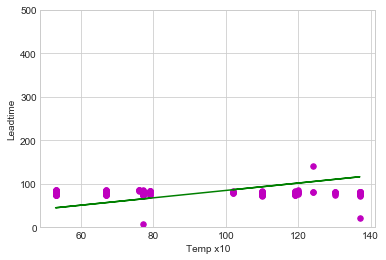

In [35]:
x1= np.array(x3, dtype=np.int32)
y1= np.array(y3, dtype=np.int32)


b = estimate_coefficients(x1, y1)
print("Estimated coefficients:\nb_0 = {}".format(b[0], b[1]))

plot_regression_line(x1, y1, b)

In [50]:
dfFinal1.corr()

,Time
Time,1.0


In [38]:
dfFinal1

,Temp,Time
132,102,83
131,102,80
130,102,82
129,102,79
128,102,82
127,102,81
116,110,82
109,110,73
110,110,81
111,110,74


# SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
rng = np.random.RandomState(0)
y = rng.randn(y1)
X = rng.randn(x1, y1)
clf = SVR(gamma='scale', C=1.0, epsilon=0.2)
clf.fit(X, y) 
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)